In [ ]:
!pip3 install transformers --upgrade
!pip3 install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the path to the Drive directory
drive_path = "/content/drive/MyDrive"

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Define the dataset path
dataset_path = os.path.join(drive_path, "dataset_code_language.csv")

# Read the dataset into a DataFrame
df = pd.read_csv(dataset_path)

# Print random examples
df.sample(n=15)

,code,language
584,<!DOCTYPE html>\n<html>\n<head>\n\t<title>HTML...,html
36,#!/bin/bash\n\n# Copyright 2017 The Kubernetes...,bash
275,/*!v3.4.1*/.c-button{border:1px solid transpar...,css
1315,from random import randint\nfrom time import s...,python
449,@import url('https://fonts.googleapis.com/css?...,css
1494,import requests\nimport json\nimport geocoder\...,python
1206,<?php\n/**\n * This file represents an example...,php
568,"<html><head><meta http-equiv=""content-type"" na...",html
256,/* inspired by http://yihui.name/cn/ */\n*{pad...,css
347,/* Webfont: LatoLatinExtBd-Italic */@font-face...,css


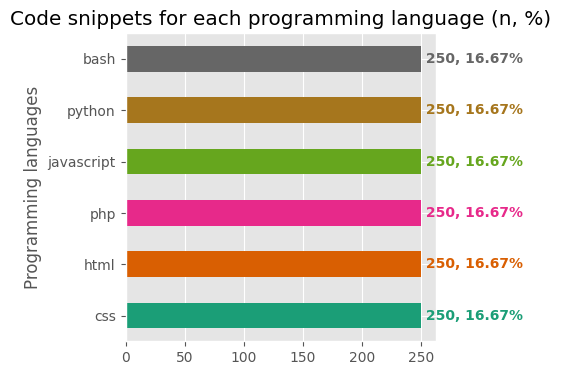

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define your custom order and reverse it for correct display
order = ['bash', 'python', 'javascript', 'php', 'html', 'css'][::-1]

# Count the values and sort by the custom order
counts = df["language"].value_counts()
counts = counts.loc[order]

num_classes = len(counts)
colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

counts.plot.barh(title="Code snippets for each programming language (n, %)", 
                 ylabel="Programming languages",
                 color=colors,
                 figsize=(4,4))

for i, v in enumerate(counts):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va="center", 
           fontweight="bold")

plt.show()

In [ ]:
class_labels = ["bash", "python", "javascript", "php", "html", "css"]

# Create a dictionary mapping each label to its index
class_indexes = {label: index for index, label in enumerate(class_labels)}

# Print the mapping to make it explicit
for class_label, index in class_indexes.items():
    print(f"{class_label}: {index}")

# Map topics descriptions to labels
df["label"] = df["language"].map(class_indexes)

bash: 0
python: 1
javascript: 2
php: 3
html: 4
css: 5


In [ ]:
def print_random_sample(df, col_name, col_value, chars=180):
  '''print a random sample
  Args:
    - df: input dataframe
    - col_name: column to use as filter (e.g. label)
    - col_value: value of col_name to use as filter 
    - chars (optional, def:180) max number of characters to display
  '''
  if col_name not in df.columns:
    print(f"Column '{col_name}' does not exist in the dataframe.")
    return

  if col_value not in df[col_name].unique():
    print(f"Value '{col_value}' does not exist in column '{col_name}'.")
    return

  filtered_df = df[df[col_name]==col_value]  
  if len(filtered_df) > 0:
    code = filtered_df.sample()["code"].values[0]
    print(f"Label: {col_value}\nCode Sample:\n```\n{code[0:chars]} ...\n```\n{'-'*50}\n")

num_labels = len(df["label"].unique())
for label_idx in range(num_labels):
  print_random_sample(df, "label", label_idx)

Label: 0
Code Sample:
```
#!/bin/bash

# Copyright 2017 The Kubernetes Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the  ...
```
--------------------------------------------------

Label: 1
Code Sample:
```
# Program make a simple calculator

# This function adds two numbers
def add(x, y):
    return x + y

# This function subtracts two numbers
def subtract(x, y):
    return x - y

#  ...
```
--------------------------------------------------

Label: 2
Code Sample:
```
import React from 'react';
import {Route,Link} from 'react-router-dom';
export default function({exact,label,to}){
  //children不管URL里的路径跟path是否匹配，都能渲染出来
  //如果URL里的路径跟当前路由规则的path匹配 ...
```
--------------------------------------------------

Label: 3
Code Sample:
```
<?php

namespace Drupal\layout_builder;

use Drupal\Component\Plugin\DerivativeInspectionInterface;
use Drupal\Core\Cache\CacheableMetadata;
use Drupal\Core\Entity\Entity\En

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df["label"].values, num_classes=num_classes)

# Split the dataset into a train set (80%) and a temporary set (20%)
# Use the 'stratify' parameter to maintain the same distribution for labels in both sets
X_train, X_temp, y_train, y_temp = train_test_split(df["code"], y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into a validation set (10%) and a test set (10%)
# Again, use the 'stratify' parameter to maintain the same distribution for labels in both sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
from transformers import RobertaTokenizer, RobertaModel, TFAutoModel
from tensorflow import keras
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.callbacks import EarlyStopping

# Load pre-trained model and its corresponding tokenizer
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
codebert_model = TFAutoModel.from_pretrained("microsoft/codebert-base")

# Prepare the input data
def encode_texts(texts):
  encoded = tokenizer(texts.tolist(), truncation=True, padding='max_length', max_length=512)
  return np.array(encoded['input_ids']), np.array(encoded['attention_mask'])
X_train_ids, X_train_mask = encode_texts(X_train)
X_val_ids, X_val_mask = encode_texts(X_val)
X_test_ids, X_test_mask = encode_texts(X_test)

# Define the inputs
input_ids = Input(shape=(512,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(512,), dtype=tf.int32, name='attention_mask')

# Get the embeddings
embedding = codebert_model(input_ids, attention_mask=attention_mask)[0]

# Define the model
X = GlobalAveragePooling1D()(embedding)
X = Dropout(0.2)(X) # dropout layer
output = Dense(num_classes, activation='softmax')(X) # final dense layer
model = Model(inputs=[input_ids, attention_mask], outputs=output) # use inputs and outputs to construct a final model

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[
              tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall'),
              tf.keras.metrics.AUC(name='auc')])

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at microsoft/codebert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
# Train the model
n_epochs = 100
batch_size = 8 # TODO: check with 8 on 16GB of RAM GPU
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", # define early stopping
                                                      patience = 5,
                                                      restore_best_weights = True)
model_fit = model.fit([X_train_ids, X_train_mask], 
                      y_train, 
                      epochs = n_epochs,
                      batch_size = batch_size,
                      validation_data = ([X_val_ids, X_val_mask], y_val),
                      callbacks = [earlystop_callback])

Epoch 1/100


150/150 [==============================] - 191s 1s/step - loss: 2.0335 - precision: 0.2157 - recall: 0.0092 - auc: 0.4928 - val_loss: 1.9116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/100
150/150 [==============================] - 154s 1s/step - loss: 1.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5008 - val_loss: 1.9141 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/100
150/150 [==============================] - 154s 1s/step - loss: 1.8848 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5115 - val_loss: 1.7977 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/100
150/150 [==============================] - 153s 1s/step - loss: 1.8515 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4845 - val_loss: 1.8273 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 5/100
 29/150 [====>.........................] - ETA: 1:59 - loss: 1.8710 - precision:

KeyboardInterrupt: ignored

ValueError: ignored

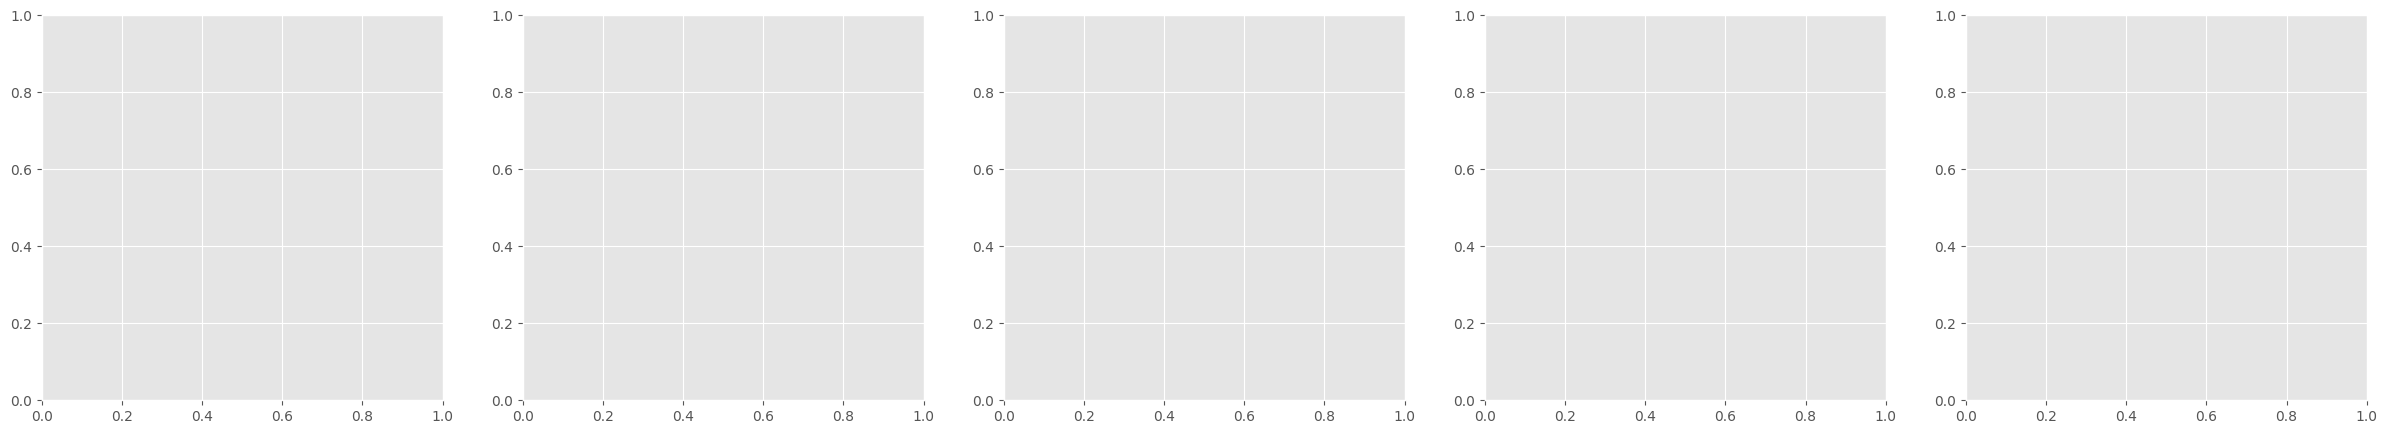

In [ ]:
def plot_metrics(model_fit):
    """Plot the training metrics for each epoch.
    
    Args:
    model_fit: The history object from model.fit().
    """
    n_epochs = len(model_fit.history[list(model_fit.history.keys())[0]])
    x = list(range(1, n_epochs+1))
    metric_list = list(model_fit.history.keys())
    num_metrics = len(metric_list) // 2

    fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

    for i in range(num_metrics):
        ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
        ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
        ax[i].set_xlabel("epochs",fontsize=14)
        ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
        ax[i].legend(loc="lower left")
    plt.show()

# Plot the metrics
plot_metrics(model_fit)

In [ ]:
# Save model
saved_model_name = "code_snippets_classifier_v1.h5"
saved_model_dirpath = os.path.join(drive_path, "/models/", saved_model_name)
model.save(saved_model_dirpath)

In [ ]:
# Load model
model = load_model(saved_model_dirpath, 
                   custom_objects={
                       'KerasLayer': tf_hub.KerasLayer,
                       'balanced_recall': balanced_recall,
                       'balanced_precision': balanced_precision,
                       'balanced_f1_score': balanced_f1_score})

In [ ]:
# Continue training
additional_epochs = 25
model_fit = model.fit(X_train, 
                      y_train, 
                      epochs = additional_epochs,
                      validation_data = (X_val, y_val),
                      callbacks = [earlystop_callback])

Epoch 1/20
38/38 [==============================] - 721s 19s/step - loss: 0.6906 - accuracy: 0.7200 - balanced_recall: 0.5934 - balanced_precision: 0.7316 - balanced_f1_score: 0.6528 - val_loss: 0.7108 - val_accuracy: 0.7333 - val_balanced_recall: 0.5728 - val_balanced_precision: 0.6761 - val_balanced_f1_score: 0.6188
Epoch 2/20
38/38 [==============================] - 698s 18s/step - loss: 0.6914 - accuracy: 0.7250 - balanced_recall: 0.5897 - balanced_precision: 0.7398 - balanced_f1_score: 0.6536 - val_loss: 0.6968 - val_accuracy: 0.6867 - val_balanced_recall: 0.5607 - val_balanced_precision: 0.6174 - val_balanced_f1_score: 0.5868
Epoch 3/20
38/38 [==============================] - 699s 18s/step - loss: 0.6912 - accuracy: 0.7158 - balanced_recall: 0.5851 - balanced_precision: 0.7395 - balanced_f1_score: 0.6493 - val_loss: 0.6915 - val_accuracy: 0.7067 - val_balanced_recall: 0.6060 - val_balanced_precision: 0.6802 - val_balanced_f1_score: 0.6393
Epoch 4/20
38/38 [======================

In [ ]:
# Update the plot with the new training history
plot_metrics(model_fit, additional_epochs + n_epochs)

In [ ]:
# Prediction function
def predict_class(texts_list):
    '''predict class of input text
    Args:
        - texts (list of strings)
    Output:
        - labels (list of int)
    '''
    return [np.argmax(pred) for pred in model.predict(texts_list)]

# Make predictions
y_pred = predict_class(X_val)

# Convert the predicted labels into a NumPy array
y_pred = np.array(y_pred)

# Check if the true labels are in multilabel-indicator format (one-hot encoded)
if y_val.shape[1] > 1:
    # convert to multiclass format
    y_val_multiclass = np.argmax(y_val, axis=1)
else:
    y_val_multiclass = y_val    

# Compare the predicted labels with the true labels
print(classification_report(y_val_multiclass, y_pred))

# Calculate accuracy with sklearn's function
accuracy = accuracy_score(y_val_multiclass, y_pred)
print(f"Accuracy: {accuracy}")

5/5 [==============================] - 77s 15s/step
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.86      0.75      0.80        24
           2       0.32      0.79      0.45        19
           3       0.33      0.03      0.06        32
           4       0.79      0.88      0.83        17
           5       0.82      0.93      0.87        29

    accuracy                           0.67       150
   macro avg       0.67      0.71      0.65       150
weighted avg       0.68      0.67      0.63       150

